In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
df_Clean_data = pd.read_csv("https://raw.githubusercontent.com/ba18406/Lab001/master/df_Clean.csv")

In [3]:
#Encoding categorical variables in dataSet
encoder1 = LabelEncoder()
df_Clean_data['Area'] = encoder1.fit_transform(df_Clean_data['Area'])
encoder2 = LabelEncoder()
df_Clean_data['Region'] = encoder2.fit_transform(df_Clean_data['Region'])
encoder3 = LabelEncoder()
df_Clean_data['State'] = encoder3.fit_transform(df_Clean_data['State'])
encoder4 = LabelEncoder()
df_Clean_data['City'] = encoder4.fit_transform(df_Clean_data['City'])
encoder5 = LabelEncoder()
df_Clean_data['Consumer_profile'] = encoder5.fit_transform(df_Clean_data['Consumer_profile'])
encoder6 = LabelEncoder()
df_Clean_data['Product_category'] = encoder6.fit_transform(df_Clean_data['Product_category'])
encoder7 = LabelEncoder()
df_Clean_data['Product_type'] = encoder7.fit_transform(df_Clean_data['Product_type'])
encoder8 = LabelEncoder()
df_Clean_data['Purchased_from'] = encoder8.fit_transform(df_Clean_data['Purchased_from'])
encoder9 = LabelEncoder()
df_Clean_data['Purpose'] = encoder9.fit_transform(df_Clean_data['Purpose'])

In [13]:
Area_data = Counter(df_Clean_data['Area'])
print("\nDataSet 3\nImbalance: ", (Area_data[0]/(Area_data[0]+Area_data[1]))*100, "%")
print(Area_data)

('\nDataSet 3\nImbalance: ', 0, '%')
Counter({1: 1354, 0: 217})


In [7]:
#Splitting the dependant and independant variables
X = df_Clean_data.iloc[:, 0:13]
Y = df_Clean_data.iloc[:, -1]

In [ ]:
#Finding the best depth for tree by performing a grid search.
#Additionaly performing 10 Fold cross validation of each classifier 
from sklearn import tree
from sklearn.model_selection import cross_val_score
depth = []
for i in range(3,20):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    # Perform 10-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X, y=Y, cv=10, n_jobs=4)
    depth.append((i,scores.mean()*100))
print(depth)
#Hence we can achieve around 85% accuracy using a decision tree if we set max depth of the tree from 5-13

In [ ]:
#Training a Random Forest Classifier.
#Also performing 10 Fold Cross Validation.
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(n_estimators=100)
randomforest.fit(X, Y)
RandomForest_CV_Score = cross_val_score(randomforest, X, Y, cv=10)
print(RandomForest_CV_Score)
print("Mean Score: ", RandomForest_CV_Score.mean())
#Hence around 85% accuracy

In [9]:
#Spliting the data into 10 equal portions using stratified K Fold. 
#Using 1 portion for testing and 9 for training.
from sklearn.model_selection import StratifiedKFold
bins = StratifiedKFold(n_splits = 10)
for train_index, test_index in bins.split(X,Y):
    #print(test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    training_data, testing_data = df_Clean_data.iloc[train_index], df_Clean_data.iloc[test_index]



For n_clusters = 2 The average silhouette_score is : 0.6437882307064046
For n_clusters = 3 The average silhouette_score is : 0.6213880333485425
For n_clusters = 4 The average silhouette_score is : 0.5960834538050809
For n_clusters = 5 The average silhouette_score is : 0.6091991443855221
For n_clusters = 6 The average silhouette_score is : 0.5990613506631828
For n_clusters = 7 The average silhouette_score is : 0.5698122013611352
For n_clusters = 8 The average silhouette_score is : 0.5410283566038776
For n_clusters = 9 The average silhouette_score is : 0.5335057628648804
For n_clusters = 10 The average silhouette_score is : 0.5422562959641974


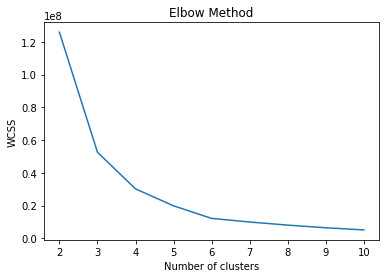

In [12]:
#Now finding the ideal number of clusters.
#Using Elbow Method

inertiaS = []
for k in range(2,11):
    km = KMeans(n_clusters = k)
    #print(km.inertia_)
    cluster_labels = km.fit_predict(X_train)
    inertiaS.append(km.inertia_)
    avg_score = silhouette_score(X_train, cluster_labels)
    print("For n_clusters =", k, "The average silhouette_score is :", avg_score)
    
plt.plot(range(2, 11), inertiaS)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#Hence according to Elbow method and silhoutte analysis, the ideal number of clusters should be 2.

In [10]:
#Running K-means on the selected number of clusters, i.e: 2
km = KMeans(n_clusters = 2, init='k-means++', max_iter=300, n_init=10, random_state=0)
km.fit(training_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
cluster_labels = km.fit_predict(X_train)
cluster_labels

In [ ]:
for a,b,c in zip(X_train, cluster_labels , Y_train):
    print(a, "cluster = ", b, "labels =", c)

In [13]:
#storing cluster number and respective centroids with number of samples
label0 = np.array([]) # cluster 0 with minority class
label1 = np.array([])# cluster 1 with minority class
count0 = 0
count1 = 0
numOfLabels0 = 0
numOfLabels1 = 0
for cluster,centroid,labels in zip(km.labels_,X_train,Y_train):
    if(cluster==0 and labels == 1):
        count0 = count0 + 1
        label0 = np.append(label0 ,[centroid,"cluster",cluster,'labels',labels])
        numOfLabels0 = count0
    elif(cluster==1 and labels == 1):
        count1 = count1 + 1
        label1 = np.append(label1 ,[centroid,"cluster",cluster,'labels',labels])
        
        numOfLabels1 = count1
        
print('total num minority class samples in cluster(0):',numOfLabels0)
print('total num minority class samples in cluster(1):',numOfLabels1)

#centroid of cluster-1 
#print("Label 0:",label0)
#centroid of cluster-2
#print("label 1:",label1)

total num minority class samples in cluster(0): 0
total num minority class samples in cluster(1): 0
